In [1]:
import sys
sys.path.append('..')

from glob import glob
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_event_lengths(csv_file):
    df_annotation = pd.read_csv(csv_file)
    event_lengths = []
    df_pos = df_annotation[(df_annotation == 'POS').any(axis=1)]
    for i in range(len(df_pos)):
        event_lengths += [df_pos.iloc[i]['Endtime'] - df_pos.iloc[i]['Starttime']]
        
    return event_lengths

In [3]:
def compile_data(report_path):
    
    report_object = json.load(open(report_path))
    
    set_tag = report_object['set_name']
    data_dict = {}
    
    for key in report_object['scores_per_audiofile'].keys():
        data_dict[key] = {}
        data_dict[key]['precision'] = report_object['scores_per_audiofile'][key]['precision']
        data_dict[key]['recall'] = report_object['scores_per_audiofile'][key]['recall']
        data_dict[key]['f-measure'] = report_object['scores_per_audiofile'][key]['f-measure']
    
    if set_tag == 'VAL':
        csv_list = val_csv
    else:
        csv_list = test_csv
        
    for csv_file in csv_list:
        event_lengths = np.array(get_event_lengths(csv_file))
        event_lengths = np.sort(event_lengths)
        data_dict[csv_file.split('/')[-1].replace('.csv', '.wav')]['event-lenghts'] = event_lengths
        data_dict[csv_file.split('/')[-1].replace('.csv', '.wav')]['event-mean'] = np.mean(event_lengths)
        data_dict[csv_file.split('/')[-1].replace('.csv', '.wav')]['event-shortest'] = event_lengths[0]
    
    return data_dict

In [4]:
val_path = '/home/willbo/data/dcase/val'
test_path = '/home/willbo/data/dcase/test'

val_csv = [file for file in glob(os.path.join(val_path, '*.csv'))]
test_csv = [file for file in glob(os.path.join(test_path, '*.csv'))]

In [5]:
val_seg01_report_path = '/home/willbo/repos/soundscape-analysis/few_shot_learning/outputs/rbigg7_specaugemnt_seg01_lazytest_l2_50neg_lr5/Evaluation_report__VAL_18012022_12_20_07.json'
val_seg03_report_path = '/home/willbo/repos/soundscape-analysis/few_shot_learning/outputs/rbigg7_specaugemnt_seg03_lazytest_lr2_50neg/Evaluation_report__VAL_14012022_17_06_21.json'
test_seg01_report_path = '/home/willbo/repos/soundscape-analysis/few_shot_learning/outputs/rbigg7_specaugemnt_seg01_lazytest_l2_50neg_lr5/Evaluation_report__TEST_19012022_00_58_53.json'
test_seg03_report_path = '/home/willbo/repos/soundscape-analysis/few_shot_learning/outputs/rbigg7_specaugemnt_seg03_lazytest_lr2_50neg/Evaluation_report__TEST_14012022_23_10_57.json'

In [6]:
val_seg01 = compile_data(val_seg01_report_path)
val_seg03 = compile_data(val_seg03_report_path)
test_seg01 = compile_data(test_seg01_report_path)
test_seg03 = compile_data(test_seg03_report_path)

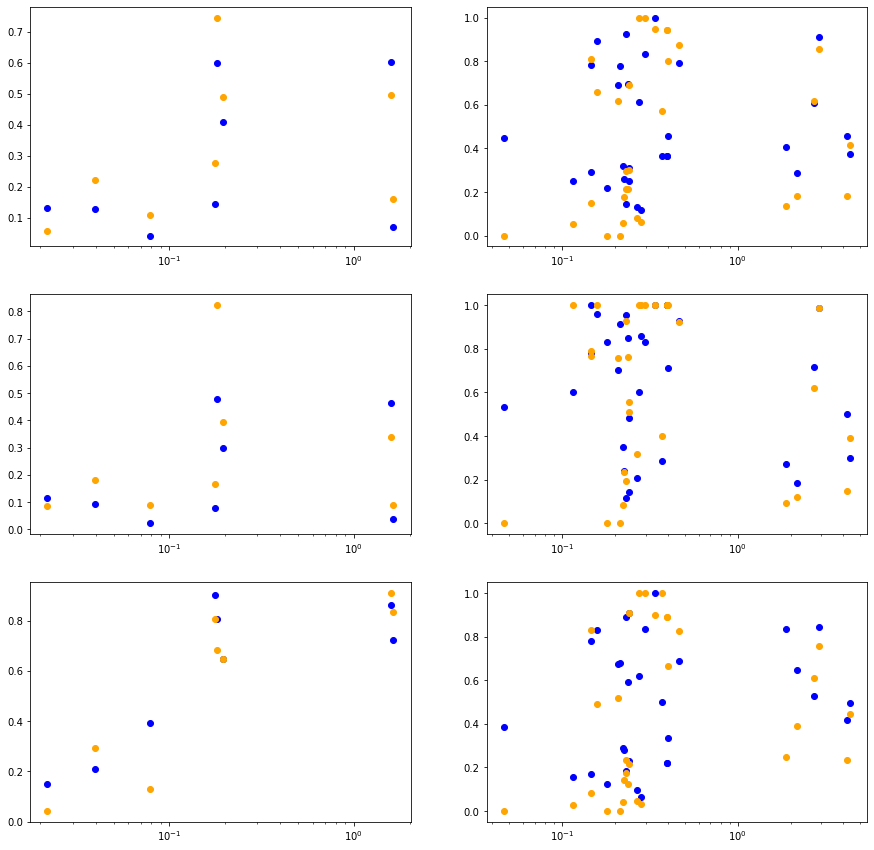

In [9]:
fig, ax = plt.subplots(3, 2, figsize=(15,15))

v_x = []
t_x = []

v_s1_y_f = []
v_s1_y_p = []
v_s1_y_r = []
v_s3_y_f = []
v_s3_y_p = []
v_s3_y_r = []

t_s1_y_f = []
t_s1_y_p = []
t_s1_y_r = []
t_s3_y_f = []
t_s3_y_p = []
t_s3_y_r = []

for key in val_seg01:
    
    v_x.append(val_seg01[key]['event-mean'])
    v_s1_y_f.append(val_seg01[key]['f-measure'])
    v_s1_y_p.append(val_seg01[key]['precision'])
    v_s1_y_r.append(val_seg01[key]['recall'])
    
    v_s3_y_f.append(val_seg03[key]['f-measure'])
    v_s3_y_p.append(val_seg03[key]['precision'])
    v_s3_y_r.append(val_seg03[key]['recall'])

    
for key in test_seg01:
    
    t_x.append(test_seg01[key]['event-mean'])
    t_s1_y_f.append(test_seg01[key]['f-measure'])
    t_s1_y_p.append(test_seg01[key]['precision'])
    t_s1_y_r.append(test_seg01[key]['recall'])
    t_s3_y_f.append(test_seg03[key]['f-measure'])
    t_s3_y_p.append(test_seg03[key]['precision'])
    t_s3_y_r.append(test_seg03[key]['recall'])
    
ax[0][0].scatter(v_x, v_s1_y_f, color='blue')
ax[0][0].scatter(v_x, v_s3_y_f, color='orange')
ax[0][0].set_xscale('log')
ax[1][0].scatter(v_x, v_s1_y_p, color='blue')
ax[1][0].scatter(v_x, v_s3_y_p, color='orange')
ax[1][0].set_xscale('log')
ax[2][0].scatter(v_x, v_s1_y_r, color='blue')
ax[2][0].scatter(v_x, v_s3_y_r, color='orange')
ax[2][0].set_xscale('log')

ax[0][1].scatter(t_x, t_s1_y_f, color='blue')
ax[0][1].scatter(t_x, t_s3_y_f, color='orange')
ax[0][1].set_xscale('log')
ax[1][1].scatter(t_x, t_s1_y_p, color='blue')
ax[1][1].scatter(t_x, t_s3_y_p, color='orange')
ax[1][1].set_xscale('log')
ax[2][1].scatter(t_x, t_s1_y_r, color='blue')
ax[2][1].scatter(t_x, t_s3_y_r, color='orange')
ax[2][1].set_xscale('log')